# Conversion Rate Prediction
##### (Inspired by [this article](https://medium.com/@nyjimmy97/data-science-interview-part-i-take-home-assignment-26ccc244f3b8))

### Objectif

Optimise a conversion rate is an important problem a data scientist could face.

The goal of this challenge is to build a model that predicts conversion rate of visitors of a website and, based on the model, come up with ideas with the marketing team to improve revenue.


### Description du challenge

We will :
1. Build a prediction model for the conversion rate (the user will/will not convert).
2. Find recommendations to give to the Product & Marketing team in order to increase this conversion rate.

The steps are:
1. Exploratory Data Analysis
2. Model Selection
3. Model Building
4. Model evaluation

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# to redefine the types
dtype_Dict = {'country': 'category',
              'age': 'int8',
              'new_user': 'int8',
              'source': 'category',
              'total_pages_visited': 'int8',
              'converted': 'int8'}

conversions = pd.read_csv('conversion_data.csv', sep=",", dtype = dtype_Dict)
sns.set(rc={'figure.figsize':(8,6)})

In [2]:
conversions.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
conversions.dtypes

country                category
age                        int8
new_user                   int8
source                 category
total_pages_visited        int8
converted                  int8
dtype: object

In [4]:
conversions.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
conversions.new_user.unique()

array([1, 0], dtype=int8)

In [6]:
conversions.source.unique()

[Ads, Seo, Direct]
Categories (3, object): [Ads, Seo, Direct]

In [7]:
conversions.country.unique()

[UK, US, China, Germany]
Categories (4, object): [UK, US, China, Germany]

We checked the sources of conversion (Ads, SEO, Direct) and the Countries which are impacted by this conversion (UK, US, China, Germany)

In [8]:
conversions.shape

(316200, 6)

In [9]:
conversions.groupby(['country']).count()

,age,new_user,source,total_pages_visited,converted
country,,,,,
China,76602,76602,76602,76602,76602
Germany,13056,13056,13056,13056,13056
UK,48450,48450,48450,48450,48450
US,178092,178092,178092,178092,178092


Here we see that we have a lot more data from US.

In [10]:
conversions.groupby(['country']).count().age[0]

76602

We remove the users which are older than 100.

In [11]:
mask = conversions.age > 100
conversions = conversions[-mask]

Now we want to see the age distribution of our users.

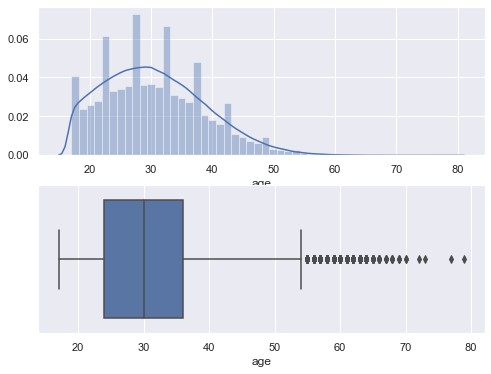

In [12]:
f, axes = plt.subplots(2, 1)
sns.distplot(conversions.age, ax=axes[0])
sns.boxplot(conversions.age, ax=axes[1])

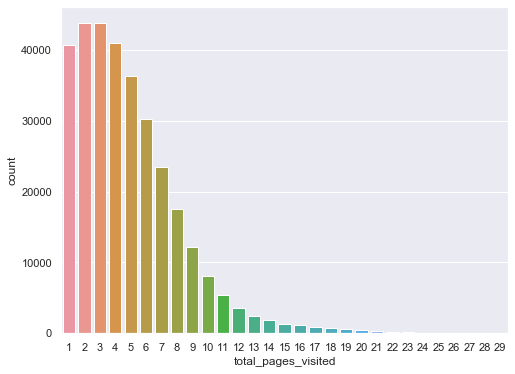

In [13]:
sns.countplot(conversions.total_pages_visited)

We don't have much data from China:

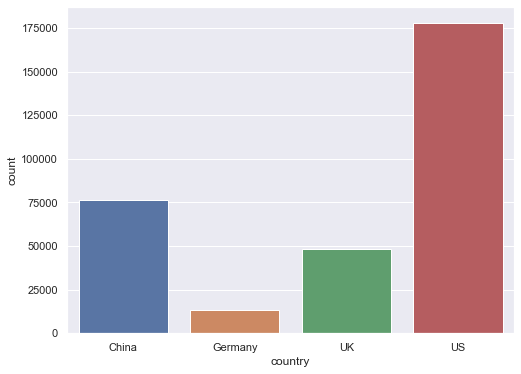

In [14]:
sns.countplot(conversions.country)

In particular, the converted in China are not a lot compared to the not converted ones. But also, the percentage of converted ones in China is a lot less than the percentage of converted in other countries.

In [15]:
countries = conversions.groupby(['country']).count().index.values
is_converted = conversions.converted == 1

for i in range(len(countries)):
    total_converted_by_country = conversions[is_converted].groupby(['country']).count().age[i]
    total_visitors = conversions.groupby(['country']).count().age[i]
    
    print("Percentage of converted in "+str(countries[i])+": ")
    print(total_converted_by_country/total_visitors*100)

Percentage of converted in China: 
0.13315579227696406
Percentage of converted in Germany: 
6.242818843355036
Percentage of converted in UK: 
5.26120250159962
Percentage of converted in US: 
3.7800687285223367


Now we see the number of converted for each country:

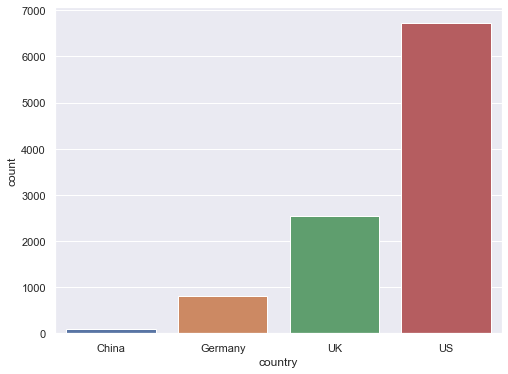

In [16]:
sns.countplot(conversions.country[conversions.converted == 1])

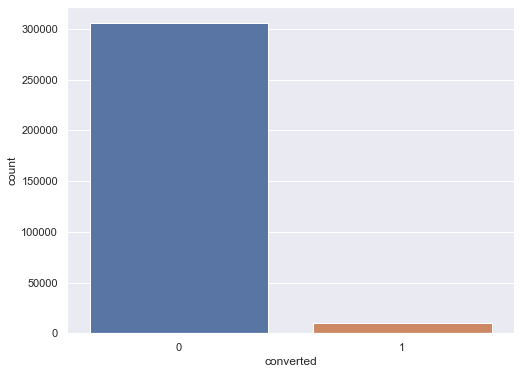

In [17]:
sns.countplot(conversions.converted)

Since there are many "non converted", if we create a model with this dataset we will risk to overfit the data on the "non converted" one. The model will be biased towards the "non converted" class.

Now let's see how the converted are "distributed" by country.

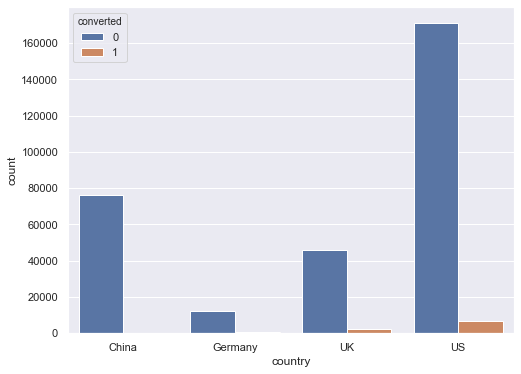

In [18]:
sns.countplot(conversions.country, hue = conversions.converted)

We see that the majority of the converted are in the US (also where we have more data).

Now let's see which one among Ads, Direct, and Seo has the highest percentage of converted:

In [19]:
sources = conversions.groupby(['source']).count().index.values
sources

[Ads, Direct, Seo]
Categories (3, object): [Ads, Direct, Seo]

In [20]:
for i in range(len(sources)):
    total_converted = conversions[is_converted].groupby(['source']).count().age[i]
    total_visitors = conversions.groupby(['source']).count().age[i]
    
    print("Percentage of converted in "+str(sources[i])+": ")
    print(total_converted/total_visitors*100)

Percentage of converted in Ads: 
3.4471878204622546
Percentage of converted in Direct: 
2.8169014084507045
Percentage of converted in Seo: 
3.288849902282651


We see that even if the number of Ads is less than the Seo, the percentage of converted is higher. So a good strategy could be to invest more in Ads.

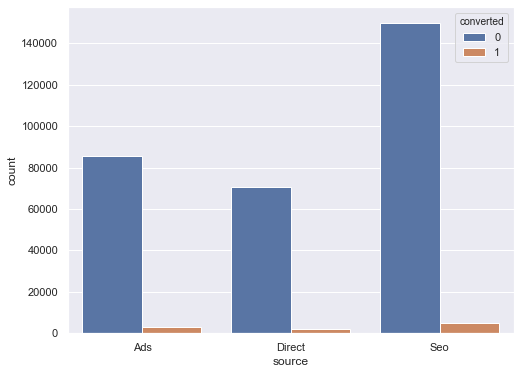

In [21]:
sns.countplot(conversions.source, hue = conversions.converted)

[[<matplotlib.axis.XTick at 0x7fa2a4c3c748>,
 [Text(0, 0, 'Old user'), Text(0, 0, 'New user')]]

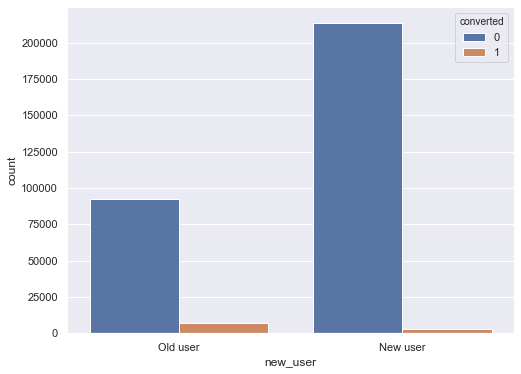

In [22]:
ax = sns.countplot(conversions.new_user, hue = conversions.converted)
ax.set(xticks=range(len(["Old user", "New user"])),
       xticklabels=["Old user", "New user"])
#ax.set_title("")

In [23]:
conversions.total_pages_visited.describe()

count    316198.000000
mean          4.872918
std           3.341053
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          29.000000
Name: total_pages_visited, dtype: float64

In [24]:
#sns.lmplot(x = "age", y = "converted", data = data, logistic=True)

In [25]:
pd.get_dummies(conversions.country).head()

,China,Germany,UK,US
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1


In [26]:
pd.get_dummies(conversions.source).head()

,Ads,Direct,Seo
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


We turn the different categorical variables into numerical variables that we can predict. In order to do this we use the ```.get_dummies``` function.

In [27]:
data = pd.get_dummies(conversions)

In [28]:
pd.get_dummies(data).head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [29]:
X = data.drop(columns = ["converted"])

In [30]:
y = data["converted"]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state = 42)

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc_50 = RandomForestClassifier(n_estimators=50)
rfc_50.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
from sklearn.metrics import classification_report

print("RANDOM FOREST")
print(classification_report(y_true = y_test, y_pred = rfc_50.predict(X_test)))

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91801
           1       0.80      0.68      0.73      3059

    accuracy                           0.98     94860
   macro avg       0.89      0.84      0.86     94860
weighted avg       0.98      0.98      0.98     94860



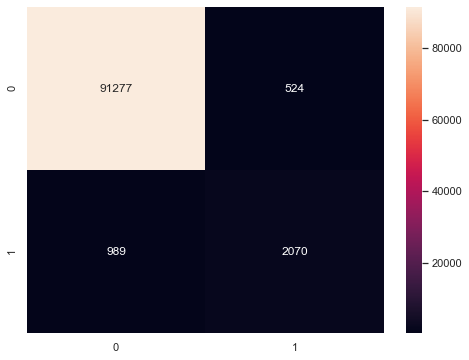

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rfc_50.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [10, 20, 50, 100] #, 'criterion' : ['gini', 'entropy']
}

grid = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                    param_grid = param_grid,
                    cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [36]:
grid.best_params_

{'n_estimators': 100}

In [37]:
print("GRID SEARCH BEST ESTIMATOR")
print(classification_report(y_true = y_test,
                            y_pred = grid.best_estimator_.predict(X_test)))

GRID SEARCH BEST ESTIMATOR
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91801
           1       0.80      0.68      0.74      3059

    accuracy                           0.98     94860
   macro avg       0.89      0.84      0.86     94860
weighted avg       0.98      0.98      0.98     94860



Using the grid search did not improve the recall (to which we are interested). A strategy could be to do a downsampling, since the dataset is imbalanced.

In [38]:
# Separate majority and minority classes
df_majority = data[data.converted==0]
df_minority = data[data.converted==1]

In [39]:
df_majority.shape[0], df_minority.shape[0]

(306000, 10198)

In [40]:
# Downsample majority class
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=df_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results

In [41]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [42]:
# Display new class counts
df_downsampled.converted.value_counts()

1    10198
0    10198
Name: converted, dtype: int64

In [43]:
y = df_downsampled.converted
X = df_downsampled.drop('converted', axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state = 42)

In [45]:
rfc_100_downsampled = RandomForestClassifier(n_estimators=100)
rfc_100_downsampled.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
print("RANDOM FOREST")
print(classification_report(y_true = y_test, y_pred = rfc_100_downsampled.predict(X_test)))

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3060
           1       0.93      0.93      0.93      3059

    accuracy                           0.93      6119
   macro avg       0.93      0.93      0.93      6119
weighted avg       0.93      0.93      0.93      6119



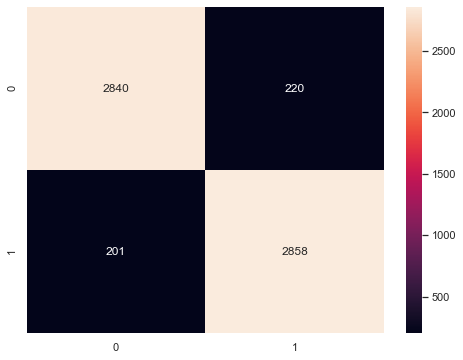

In [47]:
cm = confusion_matrix(y_test, rfc_100_downsampled.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")

With the downsampling we managed to increase the recall and we created a more accurate model.